Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


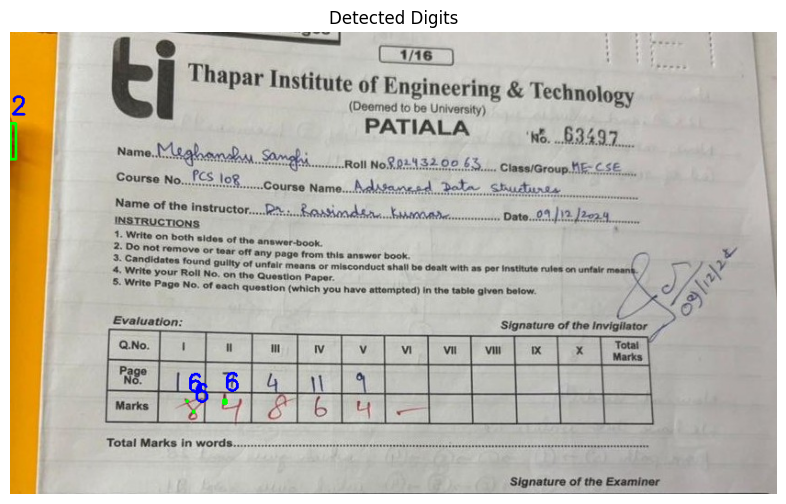

Recognized Digits (Left to Right): 2666


In [11]:
# Digit Detection Test File (Updated for model input shape compatibility)

# Cell 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import os

# Cell 2: Load the trained model (expects grayscale input with shape (28, 28, 1))
model = load_model("digit_model.h5")
print("Model loaded successfully.")

# Cell 3: Function to preprocess image regions for prediction (convert to 28x28 grayscale)
def preprocess_digit_region(img_region):
    gray = cv2.cvtColor(img_region, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28))
    normalized = resized.astype("float32") / 255.0
    reshaped = np.expand_dims(normalized, axis=-1)  # (28, 28, 1)
    final_input = np.expand_dims(reshaped, axis=0)  # (1, 28, 28, 1)
    return final_input

# Cell 4: Function to detect red-colored digits

def detect_red_regions(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red1 = np.array([0, 120, 70])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 120, 70])
    upper_red2 = np.array([180, 255, 255])

    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    red_mask = mask1 + mask2

    contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# Cell 5: Upload and process image
image_path = "test1.jpeg"  # replace with your actual image path
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image not found or unable to load.")

red_contours = detect_red_regions(image)

# Cell 6: Loop through detected contours and predict digits
predicted_digits = []
for cnt in red_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    roi = image[y:y+h, x:x+w]
    input_for_model = preprocess_digit_region(roi)
    prediction = model.predict(input_for_model)
    predicted_class = np.argmax(prediction)
    predicted_digits.append((predicted_class, (x, y, w, h)))

# Cell 7: Display the image with bounding boxes and predictions
for digit, (x, y, w, h) in predicted_digits:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image, str(digit), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Digits")
plt.axis("off")
plt.show()

# Cell 8: Print recognized digits in order
predicted_digits_sorted = sorted(predicted_digits, key=lambda x: x[1][0])
recognized_sequence = ''.join([str(d[0]) for d in predicted_digits_sorted])
print("Recognized Digits (Left to Right):", recognized_sequence)
